In [1]:
import sys
sys.path.append("/home/mgraca/Workspace/hrrr-smoke-viz/")
from libs.airnowdata import AirNowData
import pandas as pd

START_DATE = "2022-12-01-00"
END_DATE = "2024-12-01-00"
lat_bottom, lat_top = 33.5, 34.5
lon_bottom, lon_top = -118.75, -117.0
extent = (lon_bottom, lon_top, lat_bottom, lat_top)
dim = 40
frames_per_sample = 5
end_date_adj = pd.to_datetime(END_DATE) - pd.Timedelta(hours=1)

In [2]:
unimputed_airnow_data = AirNowData(
    start_date=START_DATE,
    end_date=end_date_adj,
    extent=extent,
    save_dir='/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/two_years_with_hrrr/airnow_cache/airnow.json',
    processed_cache_dir='/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/two_years_with_hrrr/airnow_cache/unimputed_airnow_processed.npz',
    frames_per_sample=frames_per_sample,
    dim=dim,
    elevation_path="/home/mgraca/Workspace/hrrr-smoke-viz/libs/inputs/elevation.npy",
    mask_path="/home/mgraca/Workspace/hrrr-smoke-viz/libs/inputs/mask.npy",
    use_mask=False,
    force_reprocess=False,
    use_interpolation=False,
    use_imputation=False
)
unimputed_Y = unimputed_airnow_data.target_stations
print(unimputed_Y.shape)

Mask usage disabled. All sensors within extent will be included.
Loading processed AirNow data from cache: /home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/two_years_with_hrrr/airnow_cache/unimputed_airnow_processed.npz
✓ Successfully loaded processed data from cache
  - Data shape: (17540, 5, 40, 40, 1)
  - Found 16 sensor locations
(17535, 5, 16)


In [3]:
imputed_airnow_data = AirNowData(
    start_date=START_DATE,
    end_date=end_date_adj,
    extent=extent,
    save_dir='/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/two_years_with_hrrr/airnow_cache/airnow.json',
    processed_cache_dir='/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/two_years_with_hrrr/airnow_cache/airnow_processed.npz',
    frames_per_sample=frames_per_sample,
    dim=dim,
    elevation_path="/home/mgraca/Workspace/hrrr-smoke-viz/libs/inputs/elevation.npy",
    mask_path="/home/mgraca/Workspace/hrrr-smoke-viz/libs/inputs/mask.npy",
    use_mask=False,
    force_reprocess=False,
)
imputed_Y = imputed_airnow_data.target_stations
print(imputed_Y.shape)

Mask usage disabled. All sensors within extent will be included.
Loading processed AirNow data from cache: /home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/two_years_with_hrrr/airnow_cache/airnow_processed.npz
✓ Successfully loaded processed data from cache
  - Data shape: (17540, 5, 40, 40, 1)
  - Found 16 sensor locations
(17535, 5, 16)


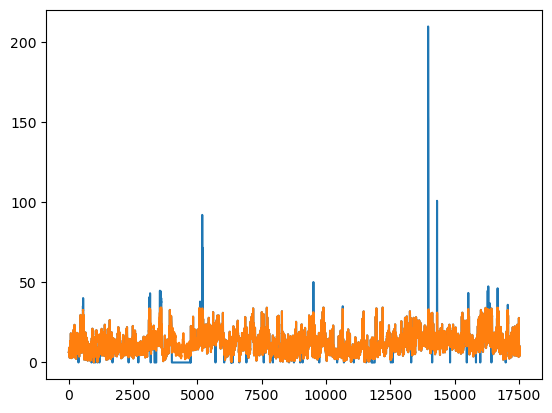

In [4]:
import matplotlib.pyplot as plt
plt.plot(unimputed_Y[:, 0, 4])
plt.plot(imputed_Y[:, 0, 4])
plt.show()

In [5]:
imputed_airnow_data.air_sens_loc

{'Simi Valley - Cochran Street': (8, 1),
 'Reseda': (12, 4),
 'Santa Clarita': (4, 5),
 'North Holywood': (12, 8),
 'Los Angeles - N. Main Street': (17, 11),
 'Compton': (23, 12),
 'Long Beach Signal Hill': (28, 13),
 'Anaheim': (26, 18),
 'Glendora - Laurel': (14, 20),
 'Mira Loma - Van Buren': (20, 28),
 'Riverside - Rubidoux': (20, 30),
 'Lake Elsinore - W. Flint Street': (32, 32),
 'Crestline - Lake Gregory': (10, 33),
 'Temecula (Lake Skinner)': (36, 38),
 'Fontana - Arrow Highway': (15, 28),
 'EBAM-2': (18, 4)}

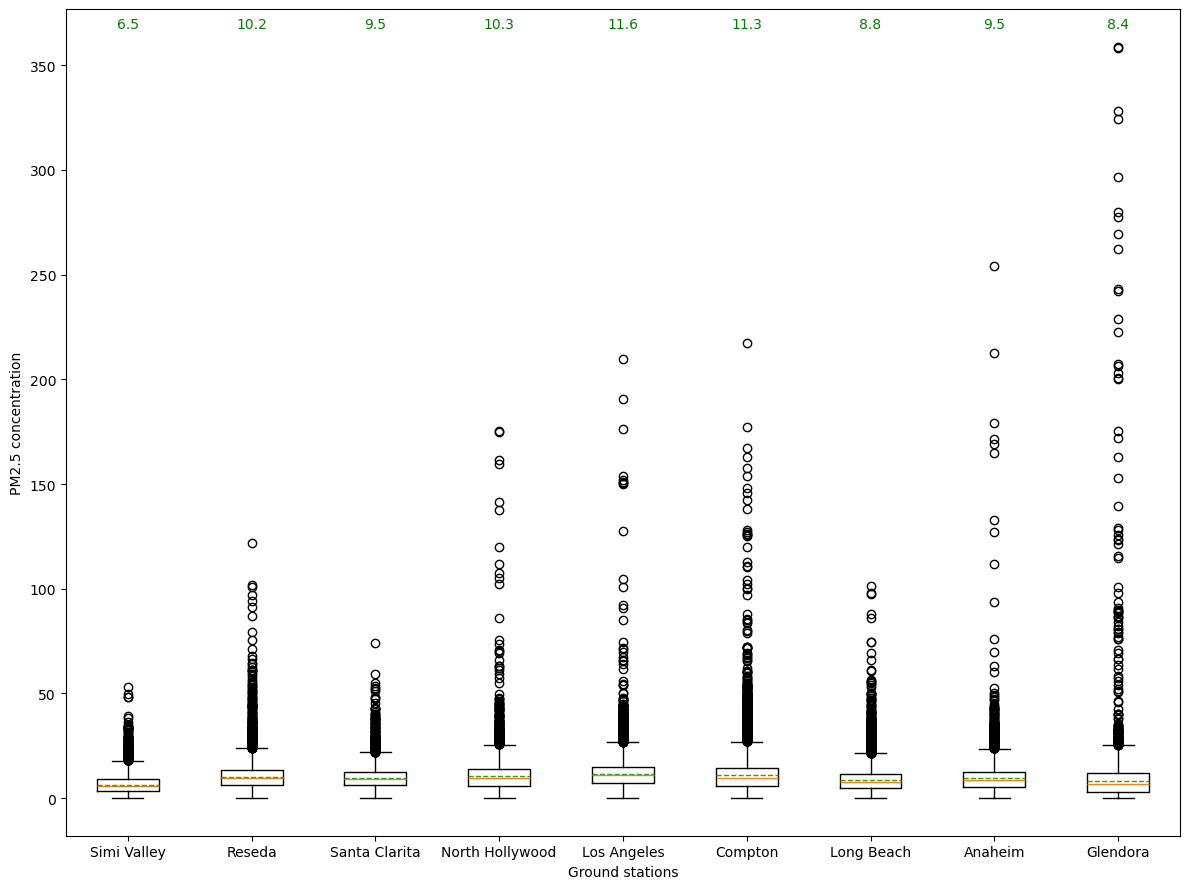

In [6]:
import numpy as np
fig = plt.figure(figsize =(12, 9))
trimmed_sensor_names = [
    'Simi Valley', 'Reseda', 'Santa Clarita', 'North Hollywood', 
    'Los Angeles', 'Compton', 'Long Beach', 'Anaheim', 'Glendora'
]
bp = plt.boxplot(
    unimputed_Y[:,0,:9], 
    tick_labels=trimmed_sensor_names, 
    meanline=True, 
    showmeans=True
)

# collect means and put them on the top row
upper_bound_text = np.max(unimputed_Y) + 7.5
for i, mean in enumerate([mean.get_ydata()[0] for mean in bp['means']]):
    plt.text(i+1, upper_bound_text, f"{mean:.1f}", ha='center', va='bottom', color='green')
plt.ylabel("PM2.5 concentration")
plt.xlabel("Ground stations")
plt.tight_layout()
plt.show()

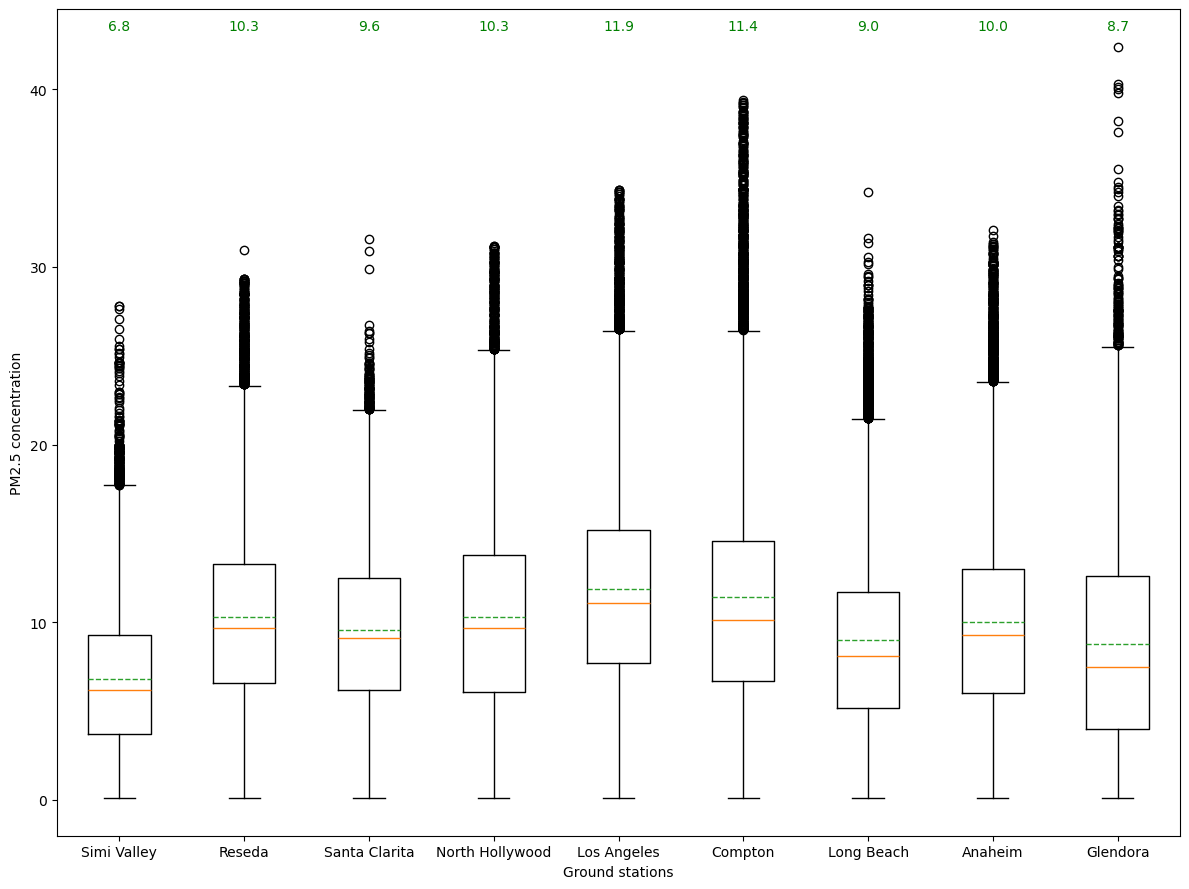

In [7]:
fig = plt.figure(figsize =(12, 9))
trimmed_sensor_names = [
    'Simi Valley', 'Reseda', 'Santa Clarita', 'North Hollywood', 
    'Los Angeles', 'Compton', 'Long Beach', 'Anaheim', 'Glendora'
]
bp = plt.boxplot(
    imputed_Y[:,0,:9], 
    tick_labels=trimmed_sensor_names, 
    meanline=True, 
    showmeans=True
)

# collect means and put them on the top row
upper_bound_text = np.max(imputed_Y) - 2.75
for i, mean in enumerate([mean.get_ydata()[0] for mean in bp['means']]):
    plt.text(i+1, upper_bound_text, f"{mean:.1f}", ha='center', va='bottom', color='green')
plt.ylabel("PM2.5 concentration")
plt.xlabel("Ground stations")
plt.tight_layout()
plt.show()

Some observations:
- Means higher than medians.
- Means across the board are higher; there are more dead sensors than outlier sensors.
- Furthermore, because a lot of dead sensors that were at 0 were imputed, this has the effect of pulling the mean higher than the median since a lot more small values were imputed over large values.